# WEB SCRAPING USING PYTHON

# IS WEB SCRAING LEGAL?

# How does web scraping works?

# Components of a web page:

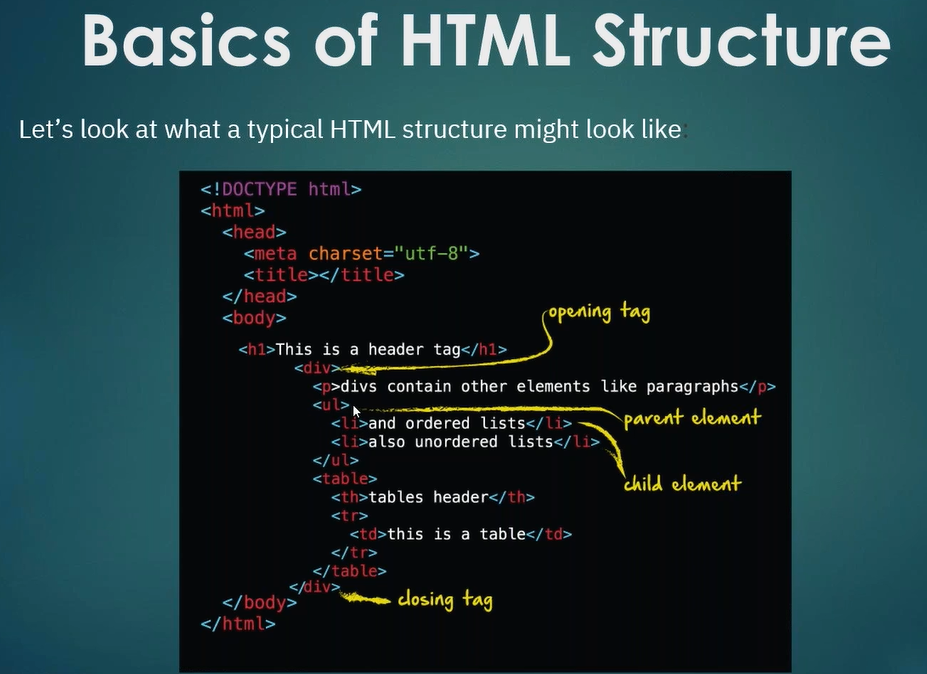

# Libraries for web scraping

Here we will focus on beautiful soup.

# Demo of Web Scraping

In [55]:
#!pip install bs4
#!pip install requests

In [56]:
from bs4 import BeautifulSoup
import requests

# Send get request to the webpage to get the source code of the page

In [57]:
# We are sending scraping request to the webpage and storing it in variable 'page'
page=requests.get('https://www.dineout.co.in/delhi-restaurants/buffet-special') 
page
#If we get response in the range of 200, then the website has given us the permission for scraping.

<Response [200]>

# Page content

In [58]:
soup=BeautifulSoup(page.content) #downloding content of the page and storing in a variable

In [59]:
soup #page content

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><style type="text/css">
            @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{
        

### Scraping First Name

In [60]:
first_title=soup.find('div',class_='restnt-info cursor')
first_title

<div class="restnt-info cursor" data-gatype="RestaurantNameClick"><a analytics-action="RestaurantCardClick" analytics-label="86792_Castle Barbeque" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/castle-barbeque-connaught-place-central-delhi-86792">Castle Barbeque</a><div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a data-name="Connaught Place" data-type="LocalityClick" href="/delhi-restaurants/central-delhi/connaught-place">Connaught Place</a>, <a data-name="Central Delhi" data-type="AreaClick" href="/delhi-restaurants/central-delhi">Central Delhi</a></div></div>

In [61]:
first_title.text

'Castle BarbequeConnaught Place, Central Delhi'

### Scraping first location

In [62]:
loc=soup.find('div',class_='restnt-loc ellipsis')
loc

<div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a data-name="Connaught Place" data-type="LocalityClick" href="/delhi-restaurants/central-delhi/connaught-place">Connaught Place</a>, <a data-name="Central Delhi" data-type="AreaClick" href="/delhi-restaurants/central-delhi">Central Delhi</a></div>

In [63]:
loc.text

'Connaught Place, Central Delhi'

### Scraping first price

In [64]:
sta=soup.find('span',class_='double-line-ellipsis')
sta

<span class="double-line-ellipsis"><span>₹ 2,000 for 2 (approx)</span><span> | </span><a data-w-onclick="stopClickPropagation|w1-restarant" href="/delhi-restaurants/north-indian-cuisine">North Indian</a><span>, </span><a data-w-onclick="stopClickPropagation|w1-restarant" href="/delhi-restaurants/chinese-cuisine">Chinese</a></span>

In [65]:
sta.text

'₹ 2,000 for 2 (approx) | North Indian, Chinese'

In [66]:
sta.text.split()  #.split() splits the string and stores them in a list

['₹', '2,000', 'for', '2', '(approx)', '|', 'North', 'Indian,', 'Chinese']

In [67]:
sta.text.split()[1]     #[1] is the index of the price from the above list

'2,000'

### Scraping Multiple Times

In [68]:
# Now we have all the tags in which there are the job titles
#Now we will extract these tags one by one by looping over these tags.

titles=[]     #empty list for storing the titles

for i in soup.find_all('div',class_="restnt-info cursor"):
    titles.append(i.text)
    
#find() is used to find out single data
#find_all() is used to find out multiple data of same class_

In [69]:
titles

['Castle BarbequeConnaught Place, Central Delhi',
 'Jungle Jamboree3CS Mall,Lajpat Nagar - 3, South Delhi',
 'Cafe KnoshThe Leela Ambience Convention Hotel,Shahdara, East Delhi',
 'Castle BarbequePacific Mall,Tagore Garden, West Delhi',
 'The Barbeque CompanyGardens Galleria,Sector 38A, Noida',
 'India GrillHilton Garden Inn,Saket, South Delhi',
 'Delhi BarbequeTaurus Sarovar Portico,Mahipalpur, South Delhi',
 'The Monarch - Bar Be Que VillageIndirapuram Habitat Centre,Indirapuram, Ghaziabad',
 'World CafeVibe by The Lalit Traveller,Sector 35, Faridabad',
 'Indian Grill RoomSuncity Business Tower,Golf Course Road, Gurgaon',
 'Mad 4 Bar B QueSector 29, Faridabad',
 'Barbeque 29NIT, Faridabad',
 'GlasshouseDoubleTree By Hilton Gurugram Baani Square,Sector 50, Gurgaon']

### Scraping multiple locations

In [70]:
location=[] #empty list

for i in soup.find_all('div',class_='restnt-loc ellipsis'):
    location.append(i.text)

In [71]:
location

['Connaught Place, Central Delhi',
 '3CS Mall,Lajpat Nagar - 3, South Delhi',
 'The Leela Ambience Convention Hotel,Shahdara, East Delhi',
 'Pacific Mall,Tagore Garden, West Delhi',
 'Gardens Galleria,Sector 38A, Noida',
 'Hilton Garden Inn,Saket, South Delhi',
 'Taurus Sarovar Portico,Mahipalpur, South Delhi',
 'Indirapuram Habitat Centre,Indirapuram, Ghaziabad',
 'Vibe by The Lalit Traveller,Sector 35, Faridabad',
 'Suncity Business Tower,Golf Course Road, Gurgaon',
 'Sector 29, Faridabad',
 'NIT, Faridabad',
 'DoubleTree By Hilton Gurugram Baani Square,Sector 50, Gurgaon']

### Scraping the multiple price

In [72]:
price=[]

for i in soup.find_all('span',class_="double-line-ellipsis"):
    price.append(i.text)

In [73]:
price

['₹ 2,000 for 2 (approx) | North Indian, Chinese',
 '₹ 1,400 for 2 (approx) | North Indian, Asian, Italian',
 '₹ 3,000 for 2 (approx) | Italian, Continental',
 '₹ 2,000 for 2 (approx) | Chinese, North Indian',
 '₹ 1,700 for 2 (approx) | North Indian, Chinese',
 '₹ 2,400 for 2 (approx) | North Indian, Italian',
 '₹ 1,800 for 2 (approx) | North Indian',
 '₹ 1,900 for 2 (approx) | North Indian, Chinese',
 '₹ 1,800 for 2 (approx) | North Indian, Chinese, Continental',
 '₹ 2,000 for 2 (approx) | North Indian, Mughlai',
 '₹ 800 for 2 (approx) | North Indian',
 '₹ 1,500 for 2 (approx) | North Indian, Mughlai, Desserts, Beverages',
 '₹ 3,400 for 2 (approx) | European, Italian, Asian, Continental']

In [74]:
price=[]

for i in soup.find_all('span',class_="double-line-ellipsis"):
    price.append(i.text.replace('|',''))  #work of replace command

In [75]:
price

['₹ 2,000 for 2 (approx)  North Indian, Chinese',
 '₹ 1,400 for 2 (approx)  North Indian, Asian, Italian',
 '₹ 3,000 for 2 (approx)  Italian, Continental',
 '₹ 2,000 for 2 (approx)  Chinese, North Indian',
 '₹ 1,700 for 2 (approx)  North Indian, Chinese',
 '₹ 2,400 for 2 (approx)  North Indian, Italian',
 '₹ 1,800 for 2 (approx)  North Indian',
 '₹ 1,900 for 2 (approx)  North Indian, Chinese',
 '₹ 1,800 for 2 (approx)  North Indian, Chinese, Continental',
 '₹ 2,000 for 2 (approx)  North Indian, Mughlai',
 '₹ 800 for 2 (approx)  North Indian',
 '₹ 1,500 for 2 (approx)  North Indian, Mughlai, Desserts, Beverages',
 '₹ 3,400 for 2 (approx)  European, Italian, Asian, Continental']

# Scraping the images URL

In [76]:
images=[]
for i in soup.find_all('img',class_='no-img'):
    images.append(i['data-src'])
    

In [77]:
images

['https://im1.dineout.co.in/images/uploads/restaurant/sharpen/8/k/b/p86792-16062953735fbe1f4d3fb7e.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/h/c/p3643-144497865356209fdd65746.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/4/p/m/p406-15438184745c04ccea491bc.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/j/o/p38113-15959192065f1fcb666130c.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/7/q/d/p79307-16051787075fad15532bd7c.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/2/v/t/p2687-1482477169585cce712b90f.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/v/f/p52501-16006856545f68865616659.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/n/o/p34822-15599107305cfa594a13c24.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/r

In [78]:
rating=[] #empty list

for i in soup.find_all('div',class_='restnt-rating rating-4'):
    rating.append(i.text)

In [79]:
rating

['3.5',
 '3.9',
 '4.3',
 '3.9',
 '4',
 '3.9',
 '3.7',
 '3.8',
 '4.2',
 '4.3',
 '3.6',
 '4.2',
 '4']

In [80]:
#printing length
print(len(titles),len(location),len(price),len(images),len(rating))

#len() gives the number of data inside the list

13 13 13 13 13


In [81]:
#Making dataframe
import pandas as pd
df=pd.DataFrame({'Titles':titles,'Location':location,'Price':price,'Images-url':images,'Rating':rating})

In [82]:
df

,Titles,Location,Price,Images-url,Rating
0,"Castle BarbequeConnaught Place, Central Delhi","Connaught Place, Central Delhi","₹ 2,000 for 2 (approx) North Indian, Chinese",https://im1.dineout.co.in/images/uploads/resta...,3.5
1,"Jungle Jamboree3CS Mall,Lajpat Nagar - 3, Sout...","3CS Mall,Lajpat Nagar - 3, South Delhi","₹ 1,400 for 2 (approx) North Indian, Asian, I...",https://im1.dineout.co.in/images/uploads/resta...,3.9
2,"Cafe KnoshThe Leela Ambience Convention Hotel,...","The Leela Ambience Convention Hotel,Shahdara, ...","₹ 3,000 for 2 (approx) Italian, Continental",https://im1.dineout.co.in/images/uploads/resta...,4.3
3,"Castle BarbequePacific Mall,Tagore Garden, Wes...","Pacific Mall,Tagore Garden, West Delhi","₹ 2,000 for 2 (approx) Chinese, North Indian",https://im1.dineout.co.in/images/uploads/resta...,3.9
4,"The Barbeque CompanyGardens Galleria,Sector 38...","Gardens Galleria,Sector 38A, Noida","₹ 1,700 for 2 (approx) North Indian, Chinese",https://im1.dineout.co.in/images/uploads/resta...,4
5,"India GrillHilton Garden Inn,Saket, South Delhi","Hilton Garden Inn,Saket, South Delhi","₹ 2,400 for 2 (approx) North Indian, Italian",https://im1.dineout.co.in/images/uploads/resta...,3.9
6,"Delhi BarbequeTaurus Sarovar Portico,Mahipalpu...","Taurus Sarovar Portico,Mahipalpur, South Delhi","₹ 1,800 for 2 (approx) North Indian",https://im1.dineout.co.in/images/uploads/resta...,3.7
7,The Monarch - Bar Be Que VillageIndirapuram Ha...,"Indirapuram Habitat Centre,Indirapuram, Ghaziabad","₹ 1,900 for 2 (approx) North Indian, Chinese",https://im1.dineout.co.in/images/uploads/resta...,3.8
8,"World CafeVibe by The Lalit Traveller,Sector 3...","Vibe by The Lalit Traveller,Sector 35, Faridabad","₹ 1,800 for 2 (approx) North Indian, Chinese,...",https://im1.dineout.co.in/images/uploads/resta...,4.2
9,"Indian Grill RoomSuncity Business Tower,Golf C...","Suncity Business Tower,Golf Course Road, Gurgaon","₹ 2,000 for 2 (approx) North Indian, Mughlai",https://im1.dineout.co.in/images/uploads/resta...,4.3
